In [679]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

#**This is our main Dataset**

In [681]:
df= pd.read_csv('Health_Sleep_Statistics.csv')
df

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,43,m,7,00:45,07:15,6500,2400,medium,medium,no,no
96,97,33,f,8,23:15,06:15,8500,2600,high,medium,no,no
97,98,46,m,4,01:30,07:00,3000,2000,low,unhealthy,yes,yes
98,99,25,f,9,22:15,06:45,9500,2700,high,healthy,no,no


#**Describe Function**

##**We used describe funtion in order to describe our dataset**

In [569]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


#**Total Sixe of our dataset**

In [571]:
df.size

1200

#**Size of Columns in our dataset**

In [573]:
df.columns.size

12

#**Info on our dataset**

In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


#**Checking if there are any Null Values in our dataset**

In [577]:
df.isna().sum()

User ID                    0
Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64

In [578]:
df.max()

User ID                          100
Age                               50
Gender                             m
Sleep Quality                      9
Bedtime                        23:45
Wake-up Time                   07:30
Daily Steps                    11000
Calories Burned                 2900
Physical Activity Level       medium
Dietary Habits             unhealthy
Sleep Disorders                  yes
Medication Usage                 yes
dtype: object

In [579]:
df.min()

User ID                          1
Age                             22
Gender                           f
Sleep Quality                    4
Bedtime                      00:15
Wake-up Time                 06:00
Daily Steps                   3000
Calories Burned               2000
Physical Activity Level       high
Dietary Habits             healthy
Sleep Disorders                 no
Medication Usage                no
dtype: object

In [580]:
df.shape

(100, 12)

#**Checking if there are any repeating Values in our dataset**

In [582]:
df.duplicated().sum()

0

#**Deleting the column User ID because we don't really need it in analysing the dataset**

In [685]:
df.drop(['User ID'], axis = 1,inplace = True)

In [687]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


#**Finding Coorelation between Age and Sleep Quality**

In [587]:
## Age vs Sleep Quality Analysis
age_sleep_quality_corr = df[['Age', 'Sleep Quality']].corr()
age_sleep_quality_corr

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


In [588]:
age_sleep_quality_corr['Age']

Age              1.000000
Sleep Quality   -0.848356
Name: Age, dtype: float64

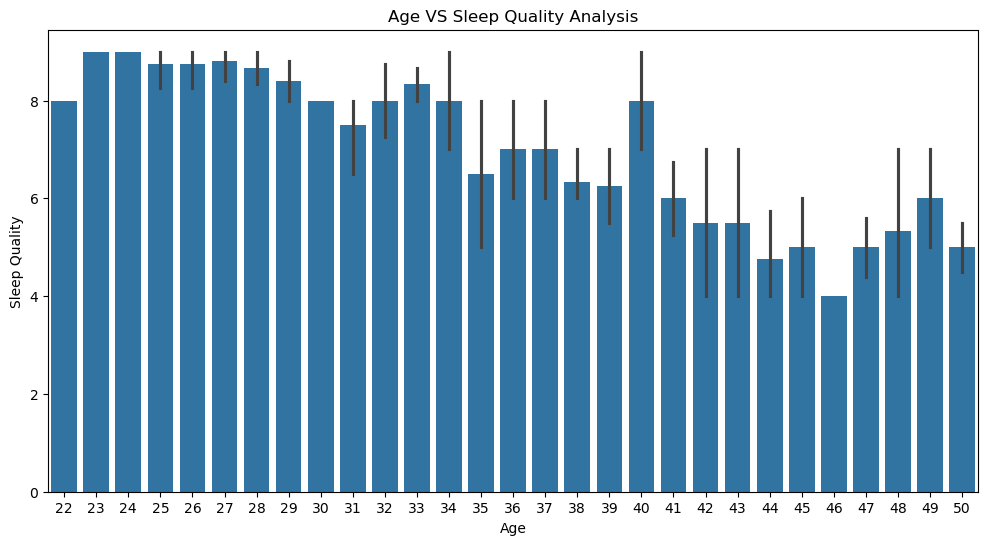

In [589]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Age', y = 'Sleep Quality', data = df)
plt.title("Age VS Sleep Quality Analysis")
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.show()

<Axes: >

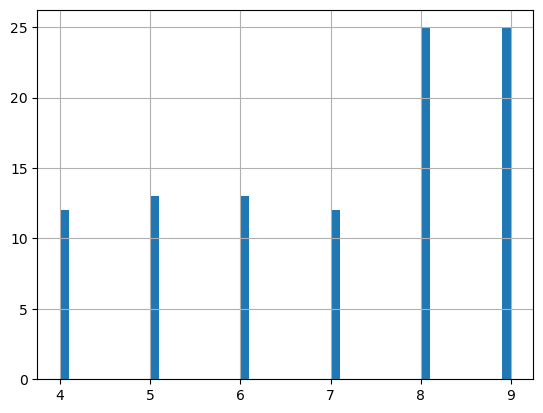

In [590]:
df['Sleep Quality'].hist(bins=50)

<Axes: >

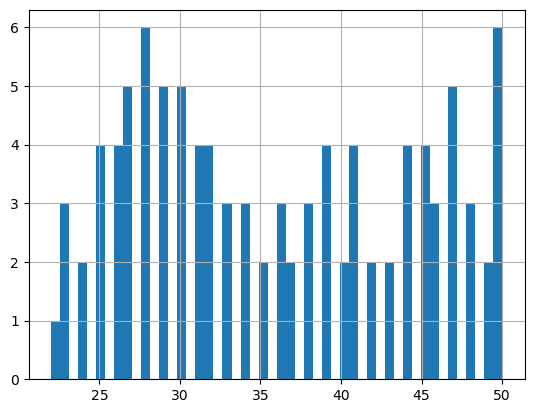

In [591]:
df['Age'].hist(bins=50)

In [592]:
from sklearn.linear_model import LinearRegression
age_sleep_quality_model = LinearRegression()

x = df[['Age']]
y = df['Sleep Quality']
age_sleep_quality_model.fit(x,y)

LinearRegression()

#**Age vs Sleep Qyality Analysis**


In [594]:
age_sleep_quality_model.intercept_

13.268812023190648

In [595]:
age_sleep_quality_model.coef_

array([-0.17408531])

In [596]:
age_sleep_quality_predictions = age_sleep_quality_model.predict(x)

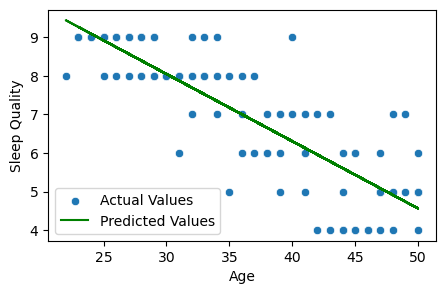

In [597]:
plt.figure(figsize = (5, 3))
sns.scatterplot(x = 'Age', y = 'Sleep Quality',data = df, label = 'Actual Values')
plt.plot(x, age_sleep_qualoty_predictions, color = 'green', label ='Predicted Values')
plt.legend()
plt.show()

In [598]:
## PHysical Activity Vs Sleep Quality
df['Physical Activity Level'].head()

0    medium
1       low
2      high
3       low
4      high
Name: Physical Activity Level, dtype: object

In [599]:
df['Sleep Quality'].head()

0    8
1    7
2    9
3    5
4    8
Name: Sleep Quality, dtype: int64

In [600]:
df['Gender'].head()

0    f
1    m
2    f
3    m
4    f
Name: Gender, dtype: object

<Axes: xlabel='Gender', ylabel='Sleep Quality'>

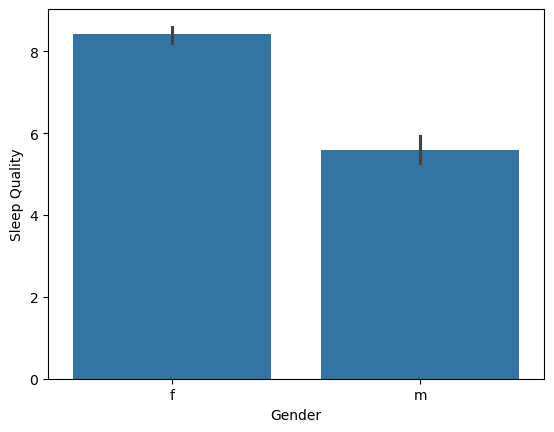

In [601]:
sns.barplot(x = 'Gender', y = 'Sleep Quality', data= df)

<Axes: xlabel='Physical Activity Level', ylabel='Sleep Quality'>

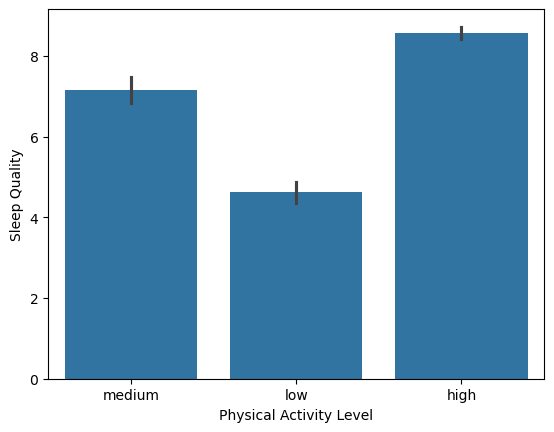

In [602]:
sns.barplot(x ='Physical Activity Level', y='Sleep Quality', data= df)

In [689]:
custom_codes = {'low':1, 'medium':2, 'high':3}
df['Physical Activity Level'] = df['Physical Activity Level'].map(custom_codes)
df['Physical Activity Level'].head()

0    2
1    1
2    3
3    1
4    3
Name: Physical Activity Level, dtype: int64

<Axes: xlabel='Gender', ylabel='Physical Activity Level'>

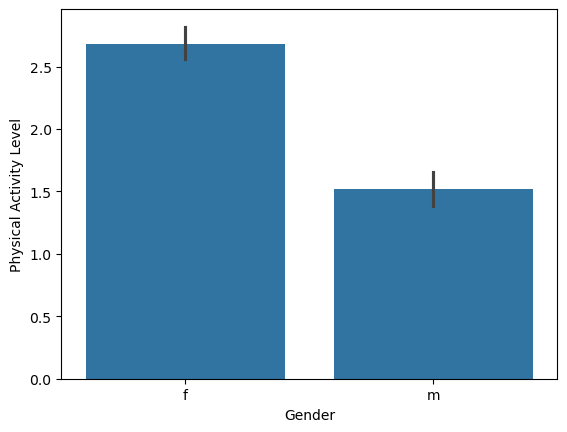

In [604]:
sns.barplot(x = 'Gender', y = 'Physical Activity Level', data= df)

#**Now doing hypothesis testing to verify wheather our finding is valid or not based on available evidence in the dataset**

In [606]:
from scipy import stats

sleep_quality_males = df[df['Gender'] == 'm']['Sleep Quality']
sleep_quality_females = df[df['Gender'] == 'f']['Sleep Quality']

physical_activity_males = df[df['Gender'] == 'm']['Physical Activity Level']
physical_activity_females = df[df['Gender'] == 'f']['Physical Activity Level']


In [607]:
t_sleep_quality, p_sleep_quality = stats.ttest_ind(sleep_quality_males, sleep_quality_females)
print(f"t_stats value for Sleep Quality vs Gender: {t_sleep_quality: = 2f}" )
print(f"p_stats value for Sleep Quality vs Gender: {p_sleep_quality: = 2f}" )

t_stats value for Sleep Quality vs Gender: -14.320329
p_stats value for Sleep Quality vs Gender:  0.000000


In [608]:
t_physical_activity, p_physical_activity = stats.ttest_ind(physical_activity_males, physical_activity_females)
print(f"t_stats value for Physical Activity Level vs Gender: {t_physical_activity: = 2f}" )
print(f"p_stats value for Physical Activity Level vs Gender: {p_physical_activity: = 2f}" )

t_stats value for Physical Activity Level vs Gender: -10.976983
p_stats value for Physical Activity Level vs Gender:  0.000000


#**Bedtime and WakeUp time vs Sleep Quality**

In [610]:
df['Bedtime'].head()

0    23:00
1    00:30
2    22:45
3    01:00
4    23:30
Name: Bedtime, dtype: object

In [611]:
df['Wake-up Time'].head()

0    06:30
1    07:00
2    06:45
3    06:30
4    07:00
Name: Wake-up Time, dtype: object

In [612]:
print(df.dtypes)

Age                         int64
Gender                     object
Sleep Quality               int64
Bedtime                    object
Wake-up Time               object
Daily Steps                 int64
Calories Burned             int64
Physical Activity Level     int64
Dietary Habits             object
Sleep Disorders            object
Medication Usage           object
dtype: object


In [691]:
def sleep_time_helper_function(str_time):
    h = str_time.split(":")[0]
    m = str_time.split(":")[1]
    return int(h) + int(m)/60

df ['Bedtime']= df['Bedtime'].apply(sleep_time_helper_function)
df ['Wake-up Time']= df['Wake-up Time'].apply(sleep_time_helper_function)

In [614]:
df['Bedtime'].head()

0    23.00
1     0.50
2    22.75
3     1.00
4    23.50
Name: Bedtime, dtype: float64

#**Creating a new column to calculate total number of hours of Sleep**

In [693]:
df['Sleep Duration Hours'] = (df['Wake-up Time'] - df['Bedtime'])% 24
df['Sleep Duration Hours'].head()

0    7.5
1    6.5
2    8.0
3    5.5
4    7.5
Name: Sleep Duration Hours, dtype: float64

In [617]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


<Axes: xlabel='Bedtime', ylabel='Sleep Quality'>

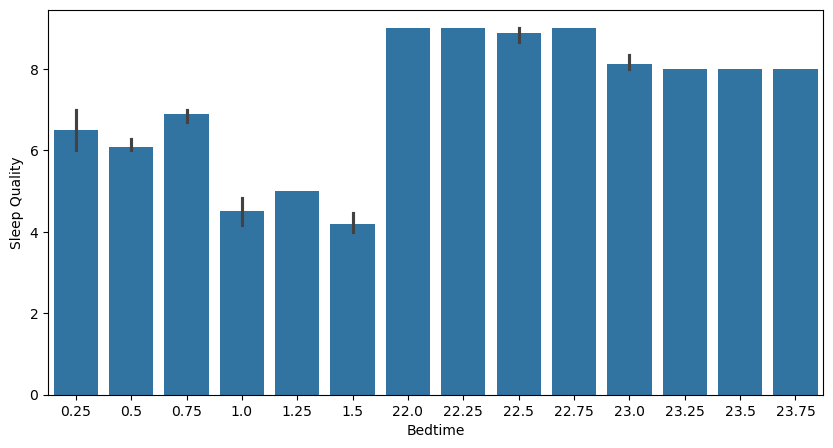

In [618]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Bedtime', y= 'Sleep Quality', data=df)

<Axes: xlabel='Wake-up Time', ylabel='Sleep Quality'>

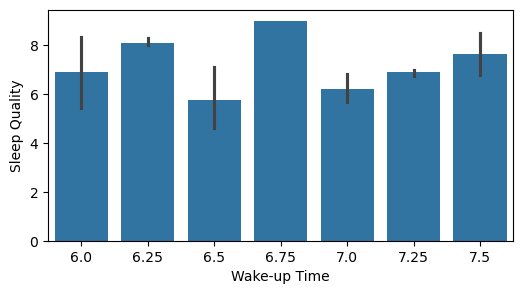

In [619]:
plt.figure(figsize=(6, 3))
sns.barplot(x = 'Wake-up Time', y= 'Sleep Quality', data=df)

<Axes: xlabel='Sleep Duration Hours', ylabel='Sleep Quality'>

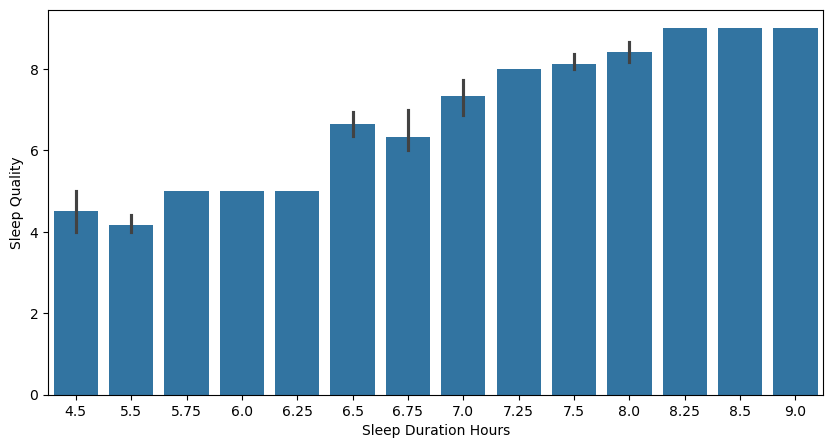

In [620]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Sleep Duration Hours', y= 'Sleep Quality', data=df)

##From this graph we can see that the more hours we sleep i-e (8-9) we get good sleep quality.

In [621]:
##now we use Linear Regression model to prove this and visualise
sleep_duration_quality_model = LinearRegression()

x = df[['Sleep Duration Hours']]
y = df['Sleep Quality']
sleep_duration_quality_model.fit(x, y)

LinearRegression()

In [622]:
sleep_duration_quality_model.coef_

array([1.36940999])

In [623]:
sleep_duration_quality_model.intercept_

-2.5755993497631504

In [624]:
predictions = sleep_duration_quality_model.predict(x)

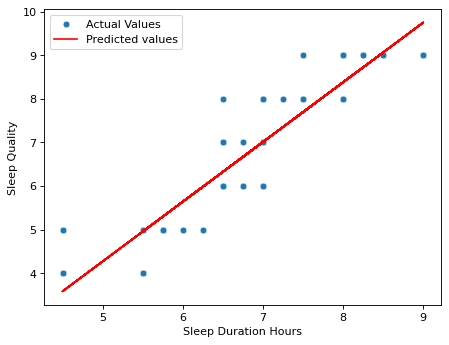

In [625]:
plt.figure(dpi = 80)
sns.scatterplot(x = 'Sleep Duration Hours', y= 'Sleep Quality', data=df, label = 'Actual Values')
plt.plot(x, predictions, color = 'red', label = 'Predicted values')
plt.legend()
plt.show()

#**Sleep Disorders Vs Sleep Quality**

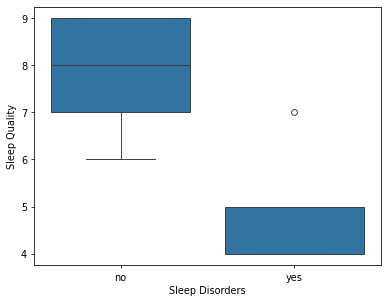

In [627]:
plt.figure(dpi = 70)
sns.boxplot( x = 'Sleep Disorders', y = 'Sleep Quality', data= df)
plt.show()

#**To find better Correlation we have to first convert all the string values into float**

In [695]:
custom_codes = {'no':0, 'yes':1}
df['Sleep Disorders'] = df['Sleep Disorders'].map(custom_codes)
df['Sleep Disorders'].head()

0    0
1    1
2    0
3    1
4    0
Name: Sleep Disorders, dtype: int64

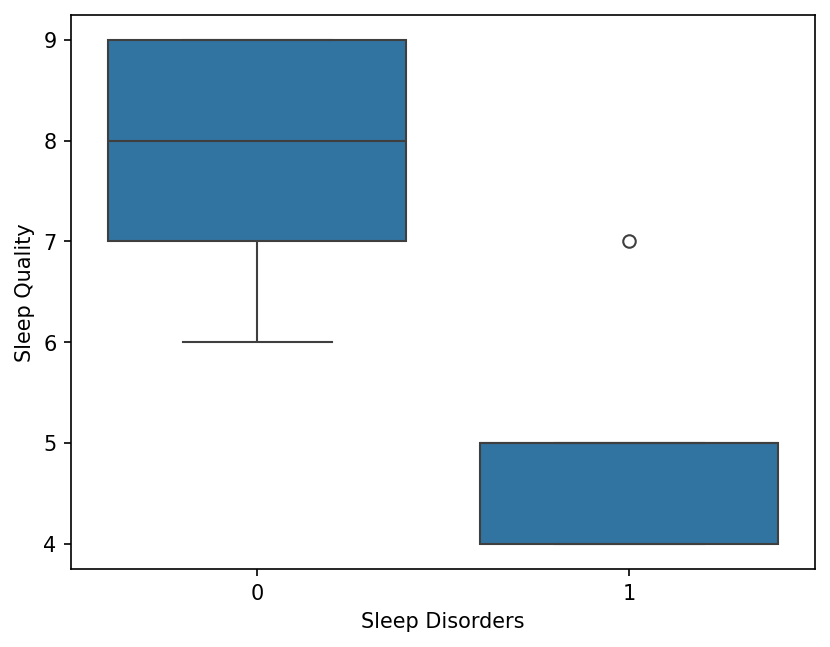

In [630]:
plt.figure(dpi = 150)
sns.boxplot( x = 'Sleep Disorders', y = 'Sleep Quality', data= df)
plt.show()

#**Dietary Habits Vs Sleep Quality**

In [697]:
custom_codes = {'unhealthy':0, 'medium' :1, 'healthy':2}
df['Dietary Habits'] = df['Dietary Habits'].map(custom_codes)
df['Dietary Habits'].head()

0    2
1    0
2    2
3    0
4    1
Name: Dietary Habits, dtype: int64

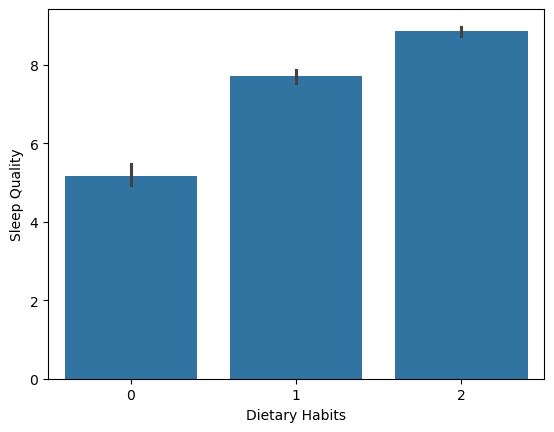

In [633]:
plt.figure(dpi = 100)
sns.barplot( x = 'Dietary Habits', y = 'Sleep Quality', data= df)
plt.show()

#**Medication Usage Vs Sleep Quality**

In [699]:
custom_codes = {'no':0, 'yes':1}
df['Medication Usage'] = df['Medication Usage'].map(custom_codes)
df['Medication Usage'].head()

0    0
1    1
2    0
3    0
4    0
Name: Medication Usage, dtype: int64

<Axes: xlabel='Medication Usage', ylabel='Sleep Quality'>

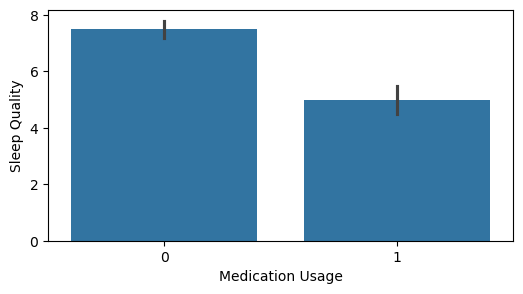

In [636]:
plt.figure(figsize=(6, 3))
sns.barplot(x = 'Medication Usage', y= 'Sleep Quality', data=df)

#**Gender(float) vs Sleep Quality**

In [701]:
custom_codes = {'m':0, 'f':1}
df['Gender'] = df['Gender'].map(custom_codes)
df['Gender'].head()

0    1
1    0
2    1
3    0
4    1
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='Sleep Quality'>

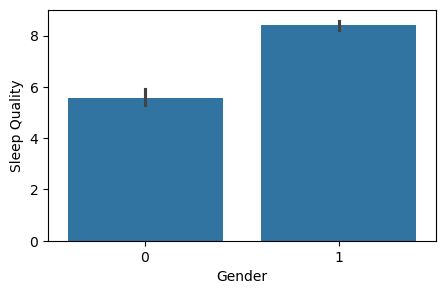

In [639]:
plt.figure(figsize=(5, 3))
sns.barplot(x = 'Gender', y= 'Sleep Quality', data=df)

In [640]:
##Updated dataframe by converting all string values into float

df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,1,8,23.00,6.50,8000,2500,2,2,0,0,7.5
1,34,0,7,0.50,7.00,5000,2200,1,0,1,1,6.5
2,29,1,9,22.75,6.75,9000,2700,3,2,0,0,8.0
3,41,0,5,1.00,6.50,4000,2100,1,0,1,0,5.5
4,22,1,8,23.50,7.00,10000,2800,3,1,0,0,7.5


#**Daily Steps Vs Sleep Quality**

<Axes: xlabel='Daily Steps', ylabel='Sleep Quality'>

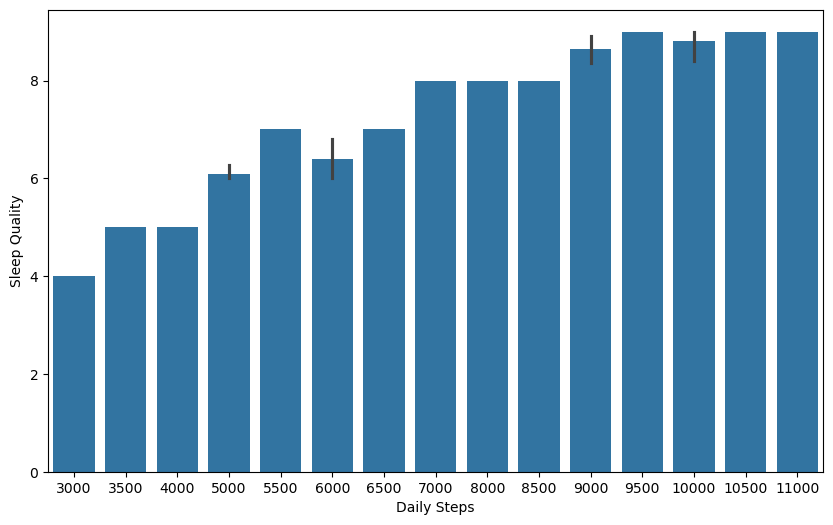

In [642]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Daily Steps', y= 'Sleep Quality', data=df)

#**Calories burned Vs Sleep Quality**

<Axes: xlabel='Calories Burned', ylabel='Sleep Quality'>

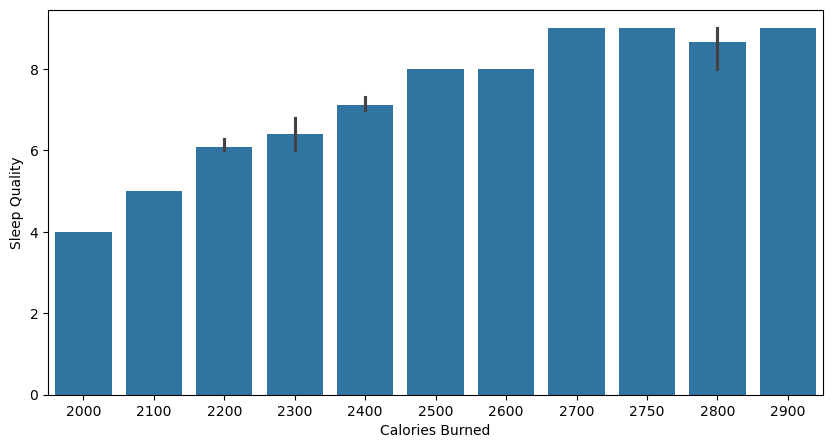

In [644]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Calories Burned', y= 'Sleep Quality', data=df)

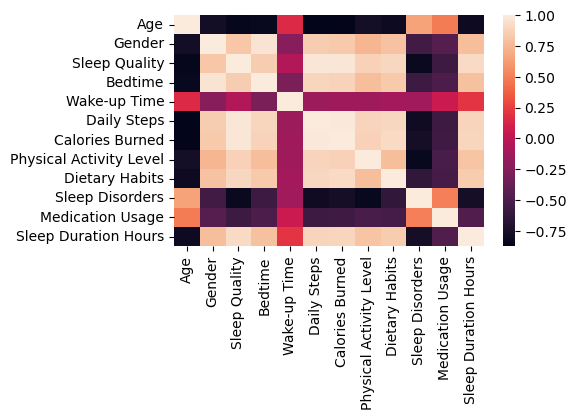

In [645]:
##Now we draw a heatmap
plt.figure(figsize =(5, 3))
sns.heatmap(df.corr())
plt.show()

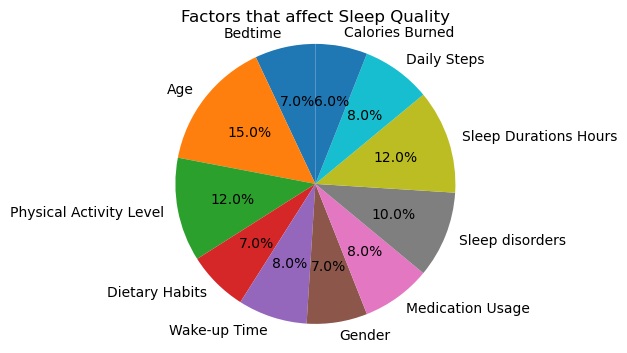

In [675]:
df = {'Bedtime': 7, 'Age': 15, 'Physical Activity Level': 12,
     'Dietary Habits':7,'Wake-up Time':8, 'Gender': 7, 'Medication Usage': 8, 
     'Sleep disorders': 10, 'Sleep Durations Hours': 12, 'Daily Steps': 8,
     'Calories Burned': 6}
labels = df.keys()
sizes = df.values()

# Plotting
plt.figure(figsize=(5, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)  
plt.axis('equal')  
plt.title('Factors that affect Sleep Quality')
plt.show()


#**From our Analysis we can now visualise how much each factor effects the Sleep Quality**

In [705]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
skewness = df[numeric_columns].skew()
kurtosis = df[numeric_columns].kurtosis()

print("\nSkewness for each column:")
print(skewness)

print("\nKurtosis for each column:")
print(kurtosis)


Skewness for each column:
Age                        0.167786
Gender                     0.000000
Sleep Quality             -0.426305
Bedtime                    0.000737
Wake-up Time              -0.473496
Daily Steps               -0.218371
Calories Burned           -0.089541
Physical Activity Level   -0.179009
Dietary Habits             0.229899
Sleep Disorders            1.111041
Medication Usage           1.522940
Sleep Duration Hours      -0.108573
dtype: float64

Kurtosis for each column:
Age                       -1.308221
Gender                    -2.041237
Sleep Quality             -1.176617
Bedtime                   -2.034177
Wake-up Time              -0.683608
Daily Steps               -1.434135
Calories Burned           -1.364569
Physical Activity Level   -1.349230
Dietary Habits            -1.521601
Sleep Disorders           -0.781627
Medication Usage           0.325452
Sleep Duration Hours      -0.742287
dtype: float64
